# Titanic Survivel Prediction

In [1]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
df1=pd.read_csv("file path")

In [3]:
df2=pd.read_csv("/kaggle/input/titanic/test.csv")

# EDA

In [3]:
df1.shape

(418, 2)

In [5]:
df2.shape

(418, 11)

In [6]:
df1.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0,B42,S


In [7]:
df2.sample()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,1071,1,"Compton, Mrs. Alexander Taylor (Mary Eliza Ing...",female,64.0,0,2,PC 17756,83.1583,E45,C


In [8]:
# We merged the two files. We have completed the missing data.
df=df1.append(df2) 

In [9]:
df.shape

(1309, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [11]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [12]:
1014/1309
# If it is more than 20% empty, you can delete that column.

0.774637127578304

# Methods for Filling Blank Data

1-Mean - Average
2-Median - Median
3-Nearest neighbor KNN - Nearest data
4-Regression
5-Fforward
6-backword
7-It fills with the most appropriate data.

In [13]:
df["Fare"].mean(), df["Fare"].max(), df["Fare"].min(), df["Fare"].std(), df["Fare"].median()

(33.29547928134557, 512.3292, 0.0, 51.75866823917411, 14.4542)

In [14]:
df["Fare"]=df["Fare"].fillna(df["Fare"].mean()) #fillna: boşlukları doldurur.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

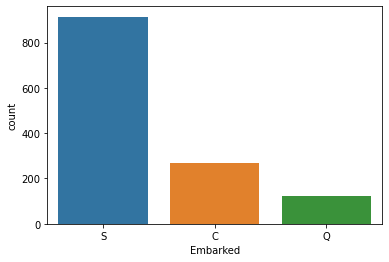

In [15]:
sns.countplot(x=df["Embarked"]) #Southampton, Cherbourg, and Queenstown. 

In [16]:
# Most repeating value
df["Embarked"].mode() 

0    S
dtype: object

In [17]:
# Data with the highest percentage
df["Embarked"].value_counts(normalize=True) 

S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dtype: float64

In [18]:
# We filled in the blanks.
df["Embarked"]=df["Embarked"].fillna("S")

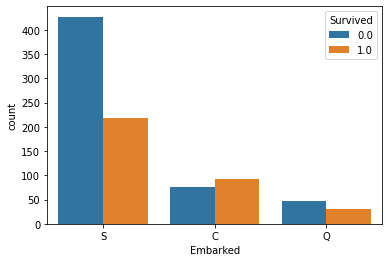

In [19]:
# Proportions of survivors by port
sns.countplot(x="Embarked",hue="Survived",data=df); 

In [20]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [21]:
del df["Cabin"]
#df.drop("Cabin",axis=1,inplace=True)
#If you want to delete more than one column, ["Cabin","...","....."] can be done.

In [22]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
715,716,0.0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,S
458,459,1.0,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,S
118,119,0.0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,C
248,1140,NaN,2,"Hold, Mrs. Stephen (Annie Margaret Hill)",female,29.0,1,0,26707,26.0000,S
6,898,NaN,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q
706,707,1.0,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.5000,S
540,541,1.0,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0000,S
210,1102,NaN,3,"Andersen, Mr. Albert Karvin",male,32.0,0,0,C 4001,22.5250,S
42,934,NaN,3,"Goldsmith, Mr. Nathan",male,41.0,0,0,SOTON/O.Q. 3101263,7.8500,S
246,247,0.0,3,"Lindahl, Miss. Agda Thorilda Viktoria",female,25.0,0,0,347071,7.7750,S


In [25]:
#Feature Engineering 

In [26]:
df["Title"]=df["Name"].str.extract('([A-Za-z]+)\.',expand=False)

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [28]:
del df["Name"]

In [29]:
df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [30]:
df["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

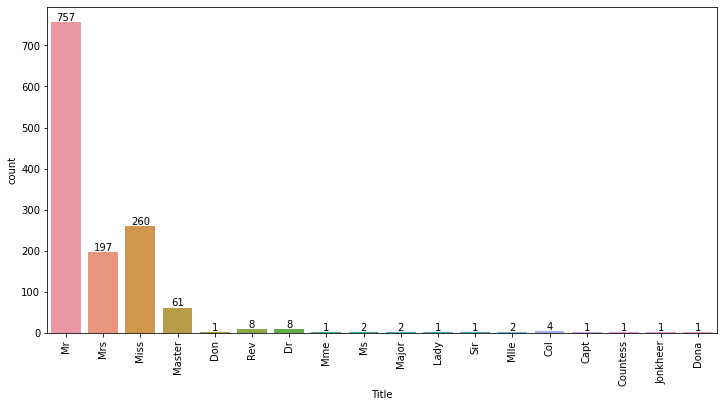

In [31]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x=df["Title"])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90);

In [32]:
df["Sex"].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [33]:
df["Title"]=df["Title"].replace(["Ms","Mlle"],"Miss")
df["Title"]=df["Title"].replace(["Mme","Countess","Lady","Dona"],"Mrs")
df["Title"]=df["Title"].replace(["Rev","Jonkheer","Don","Sir","Major","Dr","Capt","Col"],"Mr")
#replace:means to change

In [34]:
df["Title"].value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

In [35]:
df.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [36]:
df.groupby('Sex')["Age"].mean()
#groupby:collects by groups

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [37]:
df[df["Age"]<18]["Age"].mean()

9.101753246753248

In [38]:
df["Age"]=df["Age"].fillna(df.groupby("Title")["Age"].transform("median"))

In [39]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [40]:
df["Family"]=df["SibSp"]+df["Parch"]+1

In [41]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,2
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,2
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,S,Mrs,2
4,5,0.0,3,male,35.0,0,0,373450,8.0500,S,Mr,1


In [42]:
df.drop(["PassengerId","Ticket"],axis=1, inplace=True)

In [43]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,2
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,2
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,1
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,2
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,1


In [44]:
data=pd.get_dummies(df,drop_first=True)

In [45]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,2,1,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,1,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,1,0,1,0,1,0


In [46]:
train=data[:891]
test=data[891:]

In [47]:
y=train["Survived"]

In [48]:
x=train.drop("Survived",axis=1)

# Train Test Split

In [49]:
def classification_funct(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.model_selection import train_test_split,GridSearchCV

    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
              
    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    G=GradientBoostingClassifier()
      
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,stratify=y,random_state=0)
    
    
    algos=[g,b,KN,SVC,D,R,Log,G]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','GradientBoostingClassifier']
    
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
        
    print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
    
    for item in algos:

        predict=item.fit(x_train,y_train).predict(x_test)
        
        
        accuracy_scored.append(accuracy_score(y_test,predict))
        precision_scored.append(precision_score(y_test,predict))
        recall_scored.append(recall_score(y_test,predict))
        f1_scored.append(f1_score(y_test,predict))

    result=pd.DataFrame(columns=['accuracy_score','f1_score','recall_score','precision_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    result['f1_score']=f1_scored
    result['recall_score']=recall_scored
    result['precision_score']=precision_scored
    
    return result.sort_values('accuracy_score',ascending=False)

In [50]:
classification_funct(x,y)

(712, 12) (179, 12) (712,) (179,)


,accuracy_score,f1_score,recall_score,precision_score
GradientBoostingClassifier,0.860335,0.806202,0.753623,0.866667
LogisticRegression,0.810056,0.730159,0.666667,0.807018
GaussianNB,0.782123,0.702290,0.666667,0.741935
RandomForestClassifier,0.782123,0.688000,0.623188,0.767857
BernoulliNB,0.776536,0.705882,0.695652,0.716418
DecisionTreeClassifier,0.759777,0.676692,0.652174,0.703125
KNeighborsClassifier,0.715084,0.592000,0.536232,0.660714
SVC,0.625698,0.336634,0.246377,0.531250


In [51]:
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
G=GradientBoostingClassifier()

In [53]:
G.fit(x,y)

GradientBoostingClassifier()

In [54]:
del test["Survived"]

In [55]:
tahmin=G.predict(test)

In [56]:
sonuc=df2[["PassengerId"]]

In [57]:
sonuc["Survived"]=tahmin

In [58]:
sonuc["Survived"]=sonuc["Survived"].astype("int64")

In [59]:
sonuc.to_csv("titanicprediction.csv",index=False)

# Note: LogisticRegression gave the highest value. Result:0.860335